In [1]:
import pandas as pd
import nltk
# import numpy as np
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc,confusion_matrix
# from sklearn.feature_extraction.text import CountVectorizer
my_stopwords=set(stopwords.words('english'))

# reading the csv file and executing NLP pipeline
df =pd.read_csv(r'/content/FinalBalancedDataset.csv')
df=df.drop_duplicates()
# df=df.drop(['Unnamed: 0','Toxicity'],axis=1)
# tokenizing the text and removing any pucntuations and lemmatizing the text to its root
tokenizer = RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()
clean_tweets = []
for index in df.index:
  tweets = df.loc[index]['tweet']
  tweets = tweets.lower()
  tokens = tokenizer.tokenize(tweets)
  news_tokens = []
  for token in tokens:
    if token not in my_stopwords: # removing the stopwords
      token = lemmatizer.lemmatize(token)
      # token=''.join(token)
      news_tokens.append(token)


  # tagged=pos_tag(news_tokens)

  cleaned_tweets=' '.join(news_tokens)
  clean_tweets.append(cleaned_tweets)



data=clean_tweets


#   clean_tweets.append(news_tokens)
# cleaned_tweet=[]
# for tweet in clean_tweets:
#   twet=' '.join(tweet)
#   cleaned_tweet.append(twet)
# df['clean_tweets']=cleaned_tweet
# data=df['clean_tweets'].values.tolist()

# converting the cleaned data into vectors using tf-idf vectorizer
model =TfidfVectorizer()
result =(model.fit_transform(data)).toarray()
result=pd.DataFrame(result,columns = model.get_feature_names_out())
result[['Unnamed: 0','Toxicity']]=df[['Unnamed: 0','Toxicity']]
dff =result







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


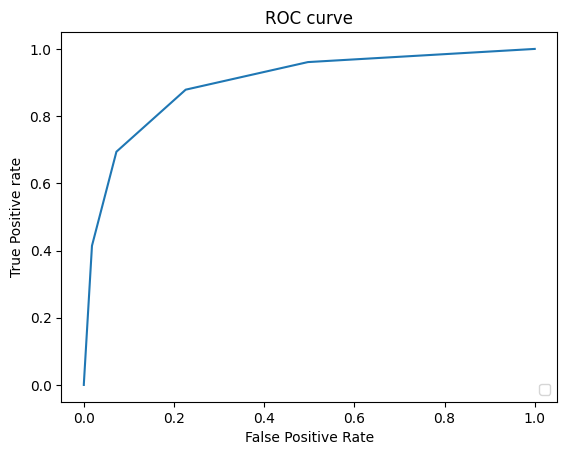

******Kneighbors*******
*******Train*******
auc_score: 0.8970958460708507
Precisio:  0.9338159255429163
Recall:  0.7859007832898173
F1 score:  0.8534971644612478
Confusion : [[1587   64]
 [ 246  903]]
*******Test******
Precisio:  0.8857142857142857
Recall:  0.6940298507462687
F1 score:  0.7782426778242679
Confusion: [[616  48]
 [164 372]]

 



In [2]:
# creating sample from data set and training the model
sampled_data=dff.sample(n=4000)
dff_s=sampled_data
x=dff_s.drop(['Unnamed: 0','Toxicity'],axis=1)
y=dff_s['Toxicity']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

import matplotlib.pyplot as plt
import sklearn.metrics as metrics
#performing predictions on KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
pred_prob=model.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

print('******Kneighbors*******')
print('*******Train*******')
print('auc_score:',roc_auc)
print('Precisio: ',precision_score(y_train,train_predict))
print('Recall: ',recall_score(y_train,train_predict))
print('F1 score: ',f1_score(y_train,train_predict))
print('Confusion :',confusion_matrix(y_train,train_predict))
print('*******Test******')
print('Precisio: ',precision_score(y_test,test_predict))
print('Recall: ',recall_score(y_test,test_predict))
print('F1 score: ',f1_score(y_test,test_predict))
print('Confusion:',confusion_matrix(y_test,test_predict))
print('\n \n')



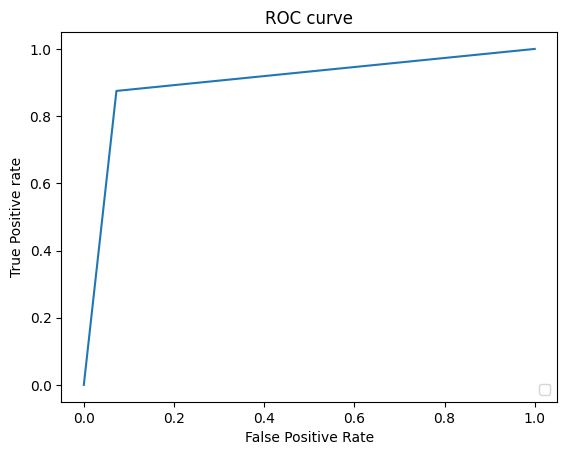

******DecisionTreeClassifier*******
*******Train*******
auc_score: 0.901355421686747
Precisio:  1.0
Recall:  1.0
F1 score:  1.0
Confusion : [[1651    0]
 [   0 1149]]
*******Test******
Precisio:  0.90715667311412
Recall:  0.875
F1 score:  0.8907882241215574
Confusion: [[616  48]
 [ 67 469]]

 



In [3]:
#performing predictions on DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
pred_prob=model.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
print('******DecisionTreeClassifier*******')
print('*******Train*******')
print('auc_score:',roc_auc)
print('Precisio: ',precision_score(y_train,train_predict))
print('Recall: ',recall_score(y_train,train_predict))
print('F1 score: ',f1_score(y_train,train_predict))
print('Confusion :',confusion_matrix(y_train,train_predict))
print('*******Test******')
print('Precisio: ',precision_score(y_test,test_predict))
print('Recall: ',recall_score(y_test,test_predict))
print('F1 score: ',f1_score(y_test,test_predict))
print('Confusion:',confusion_matrix(y_test,test_predict))
print('\n \n')

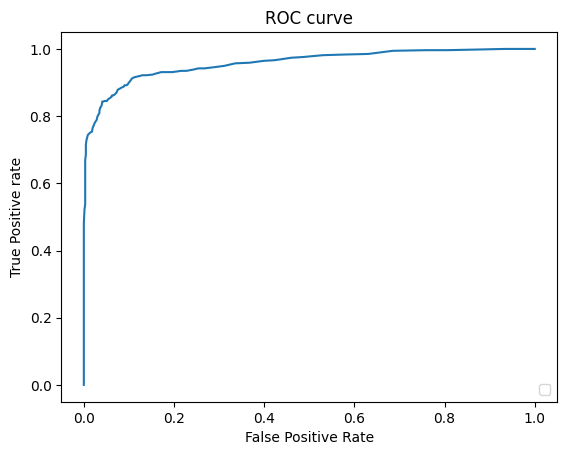

******RandomForest*******
*******Train*******
auc_score: 0.9577217451897141
Precisio:  1.0
Recall:  1.0
F1 score:  1.0
Confusion : [[1651    0]
 [   0 1149]]
*******Test******
Precisio:  0.9301848049281314
Recall:  0.8451492537313433
F1 score:  0.8856304985337243
Confusion: [[630  34]
 [ 83 453]]

 



In [4]:
#performing predictions on RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
pred_prob=model.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
print('******RandomForest*******')
print('*******Train*******')
print('auc_score:',roc_auc)
print('Precisio: ',precision_score(y_train,train_predict))
print('Recall: ',recall_score(y_train,train_predict))
print('F1 score: ',f1_score(y_train,train_predict))
print('Confusion :',confusion_matrix(y_train,train_predict))
print('*******Test******')
print('Precisio: ',precision_score(y_test,test_predict))
print('Recall: ',recall_score(y_test,test_predict))
print('F1 score: ',f1_score(y_test,test_predict))
print('Confusion:',confusion_matrix(y_test,test_predict))
print('\n \n')

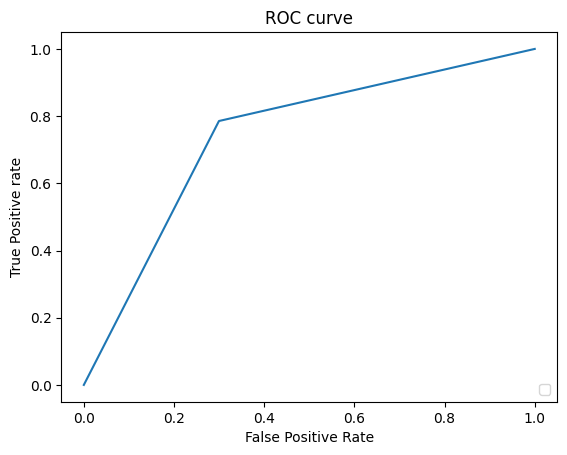

******GaussianNB*******
*******Train*******
auc_score: 0.7428744830066535
Precisio:  0.9303643724696357
Recall:  1.0
F1 score:  0.9639261744966444
Confusion : [[1565   86]
 [   0 1149]]
*******Test******
Precisio:  0.6790322580645162
Recall:  0.7854477611940298
F1 score:  0.7283737024221454
Confusion: [[465 199]
 [115 421]]

 



In [5]:
#performing predictions on GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
pred_prob=model.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
print('******GaussianNB*******')
print('*******Train*******')
print('auc_score:',roc_auc)
print('Precisio: ',precision_score(y_train,train_predict))
print('Recall: ',recall_score(y_train,train_predict))
print('F1 score: ',f1_score(y_train,train_predict))
print('Confusion :',confusion_matrix(y_train,train_predict))
print('*******Test******')
print('Precisio: ',precision_score(y_test,test_predict))
print('Recall: ',recall_score(y_test,test_predict))
print('F1 score: ',f1_score(y_test,test_predict))
print('Confusion:',confusion_matrix(y_test,test_predict))
print('\n \n')

In [ ]:
#performing predictions on SVC
model=SVC(probability=True)
model.fit(x_train,y_train)
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
pred_prob=model.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
print('******SVC*******')
print('*******Train*******')
print('auc_score:',roc_auc)
print('Precisio: ',precision_score(y_train,train_predict))
print('Recall: ',recall_score(y_train,train_predict))
print('F1 score: ',f1_score(y_train,train_predict))
print('Confusion :',confusion_matrix(y_train,train_predict))
print('*******Test******')
print('Precisio: ',precision_score(y_test,test_predict))
print('Recall: ',recall_score(y_test,test_predict))
print('F1 score: ',f1_score(y_test,test_predict))
print('Confusion:',confusion_matrix(y_test,test_predict))
print('\n \n')